In [3]:
from Voxel_Data_Process import *
import gzip,pickle
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [4]:
def read_y_val(pixel_size, fold):
#     (x_train,y_train,x_val,y_val)=load_fold_data(pixel_size,fold)
#     (x_train,y_train,x_val,y_val)=k_fold(pixel_size,fold)
    (x_train,y_train,x_val,y_val)=k_fold(pixel_size,fold,0)

    return y_val


# 将y_val从[0 1]的双标签转为单标签
def convert_label(y_val):
     
    y_val_after = []
    y_val = list(y_val)
    
    for t in y_val:
        t = list(t)       
        if t == [1,0]:
            y_val_after.append(0)
        else:
            y_val_after.append(1)
    
    return (np.array(y_val_after))

def convert_label_pred(y_val_pred):
    # 阈值
    threshold = 0.5
    
    predicted_class = []
    
    for temp in y_val_pred:
        if temp[1] < threshold:
            predicted_class.append(0)
        else:
            predicted_class.append(1)
        
    return (np.array(predicted_class))


In [5]:
def read_y_val_pred(function, time, ROC):
    
    # 预测的y_val_pred, 0-4对于第几则训练
    y_val_pred = []
    
    # 判断是否含有SVM
    if ('SVM' in function):
        function1 = function[:-4]
        
        for fold in range(1,6):
            with gzip.open('./Predict/'+function+'/'+function+'_Pred_'+(str)(fold)+'_4.pkl','rb') as f:
                temp = pickle.load(f)
                if ROC == 0:
                    temp = convert_label_pred(temp)
                y_val_pred.append(temp)
        print ('SVM')
    else:
        for fold in range(1,6):
            with gzip.open('./Predict/'+function+'/'+function+'_Pred_'+(str)(fold)+'_4.pkl','rb') as f:
                temp = pickle.load(f)
                print (temp.shape)
                if ROC == 0:
                    temp = convert_label_pred(temp)
                y_val_pred.append(temp)
        print ('No, SVM')
        
        
    return y_val_pred

In [10]:
def draw_ROC(function, time,line_color,pic_name):
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    y_pred = read_y_val_pred(function, time, 0)
    for fold in range(0, 5):
        fpr, tpr, thresholds = roc_curve(y_val[fold].ravel(), y_pred[fold].ravel())
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        
    # 计算fpr, tpr平均值
    mean_tpr /= 5
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, linestyle='--',
        label=pic_name+' (AUC = %0.3f)' % mean_auc,lw=2,color=line_color)
    
#     f = open('/home/ilab/Jupyter/CNN/Voxel_PY/Result/'+function+'.txt','a')
#     f.write('AUC : '+str(mean_auc)+'\n')
#     f.close()






In [8]:
y_val = []
for fold in range(1, 6):
    temp = read_y_val(pixel_size, fold)
    temp = convert_label(temp)
    y_val.append(temp)

397
384
(2343, 64, 64, 64, 1)
Start to split dataset....
Random split dataset success....
397
384
(2343, 64, 64, 64, 1)
Start to split dataset....
Random split dataset success....
397
384
(2343, 64, 64, 64, 1)
Start to split dataset....
Random split dataset success....
397
384
(2343, 64, 64, 64, 1)
Start to split dataset....
Random split dataset success....
397
384
(2343, 64, 64, 64, 1)
Start to split dataset....
Random split dataset success....


(469, 2)
(469, 2)
(469, 2)
(469, 2)
(469, 2)
No, SVM
(469, 2)
(469, 2)
(469, 2)
(469, 2)
(469, 2)
No, SVM


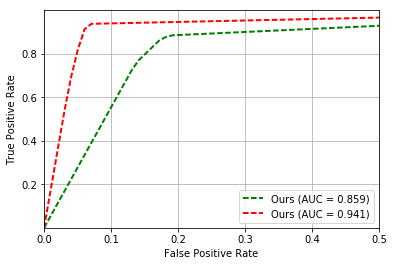

In [12]:

draw_ROC('Final_NO_Saliency_SSD_Patience15', 0,'green','Ours')
draw_ROC('Final_Sailency_ConMultiply_FeatureAddFusion_Addloss_Patience15', 0,'red','Ours')


# draw_ROC('Single_Dilation_Conv', 0,'black','Ours')
# draw_ROC('Single_Dilation_Conv', 0,'red','Dilation-4')

# draw_ROC('Single_Dilation_Conv', 3,'pink','Ours')

# draw_ROC('Single_Dilation_3_Conv', 4,'blue','Dilation-1')
# draw_ROC('Single_Dilation_1_Conv', 4,'green','Dilation-2')

# draw_ROC('Single_Dilation_2_Conv', 4,'black','Dilation-3')

# draw_ROC('Single_Dilation_4_Conv', 4,'red','Dilation-4')




lw = 2
# 画ROC曲线
plt.grid(True)
# plt.plot([0,0.5],[0,1], linestyle='--',color='black')
xlim=np.arange(0,0.6,0.1)
ylim=np.arange(0.2,1,0.2)

# plt.xticks.set_major_formatter(FormatStrFormatter('%g'))
plt.xticks(xlim)
plt.yticks(ylim)

plt.xlim([0,0.5])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
# plt.savefig('/home/ilab/Jupyter/CNN/Voxel_PY/Result/Result_1.png',figsize=(50, 50), dpi=400)
# plt.savefig('/home/ilab/Jupyter/CNN/Voxel_PY/Result/Common_Result.png',figsize=(50, 50), dpi=400)

plt.show()